In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [84]:
hal = pd.read_csv('../HomeworkProjectFolder/UpdatedData.csv')

In [85]:
hal.head()

,FED_RESPONSE_ID,SURVEY_TIME,SURVEY_NAME,AT_SITE_ID(1),AT_CREATIVE_ID(2),AT_PLACEMENT_ID(3),AT_DAYS_SINCE_IMPRESSION(4),AT_IMPRESSION_TIME(5),AGE(6),GENDER(7),...,att6,att7,att8,att9,att10,att11,att12,atttotal,reco,reco.bk
0,E153FDB4-CEBF-E511-8111-125BDAFF1DF1,1/20/2016 17:37,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,11.0,2016-01-09T13.22.37.584000,67,1,...,1,0,1,0,1,7,9,22,1,9
1,E9219D50-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:41,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,1.0,2016-01-19T13.23.57.881000,55,2,...,0,1,0,0,0,8,8,18,1,8
2,950E6AA4-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:43,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,8.0,2016-01-12T04.39.55.858000,52,2,...,0,1,0,1,0,2,3,8,0,2
3,F9A550FE-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:46,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,2.0,2016-01-18T18.31.19.349000,64,2,...,0,0,0,0,0,7,8,15,0,7
4,D1194D0A-D0BF-E511-8111-125BDAFF1DF1,1/20/2016 17:46,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,0.0,2016-01-20T02.20.35.276000,56,2,...,0,0,0,0,0,3,5,8,0,3


In [45]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['att1','att2','att3','att4','att5','att6','att7','att8','att9','att10','att11','att12']
X = hal[feature_cols]
y = hal.reco
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
hal['reco_pred'] = linreg.predict(X)
hal.head()

,FED_RESPONSE_ID,SURVEY_TIME,SURVEY_NAME,AT_SITE_ID(1),AT_CREATIVE_ID(2),AT_PLACEMENT_ID(3),AT_DAYS_SINCE_IMPRESSION(4),AT_IMPRESSION_TIME(5),AGE(6),GENDER(7),...,att6,att7,att8,att9,att10,att11,att12,reco,reco.bk,reco_pred
0,E153FDB4-CEBF-E511-8111-125BDAFF1DF1,1/20/2016 17:37,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,11.0,2016-01-09T13.22.37.584000,67,1,...,1,0,1,0,1,7,9,1,9,0.499473
1,E9219D50-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:41,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,1.0,2016-01-19T13.23.57.881000,55,2,...,0,1,0,0,0,8,8,1,8,0.439329
2,950E6AA4-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:43,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,8.0,2016-01-12T04.39.55.858000,52,2,...,0,1,0,1,0,2,3,0,2,-0.023095
3,F9A550FE-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:46,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,2.0,2016-01-18T18.31.19.349000,64,2,...,0,0,0,0,0,7,8,0,7,0.369940
4,D1194D0A-D0BF-E511-8111-125BDAFF1DF1,1/20/2016 17:46,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,0.0,2016-01-20T02.20.35.276000,56,2,...,0,0,0,0,0,3,5,0,3,0.072431


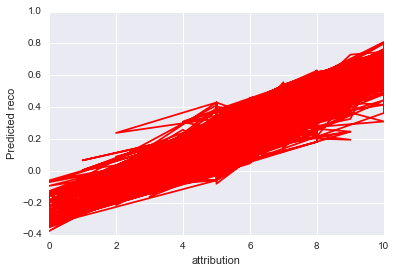

In [47]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(hal.att12, hal.reco_pred, color='red')
plt.xlabel('attribution')
plt.ylabel('Predicted reco')

In [35]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['att1','att2','att3','att4','att5','att6','att7','att8','att9','att10','att11','att12']
X = hal[feature_cols]
y = hal.reco
logreg.fit(X, y)
hal['reco_pred'] = logreg.predict(X)

In [76]:
logreg.score(X,y)

0.88327962764052992

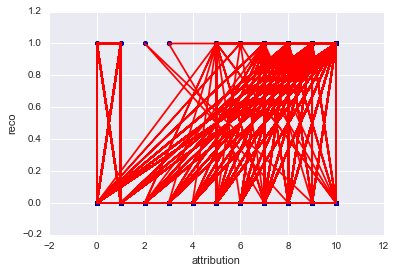

In [40]:
plt.scatter(hal.att12, hal.reco)
plt.plot(hal[feature_cols], hal.reco_pred, color='red')
plt.xlabel('attribution')
plt.ylabel('reco')

In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('att1', 0.043530675450532866),
 ('att2', 0.13282667842643797),
 ('att3', 0.18781415814291103),
 ('att4', -0.02875440049522051),
 ('att5', 0.19451572885576202),
 ('att6', -0.30367846597196274),
 ('att7', 0.12571187159780517),
 ('att8', -0.17142962761354685),
 ('att9', -0.062632901178544573),
 ('att10', 0.33331594589983438),
 ('att11', 0.274754777432349),
 ('att12', 0.74319184524510962)]

In [78]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [79]:
hal.head()

,FED_RESPONSE_ID,SURVEY_TIME,SURVEY_NAME,AT_SITE_ID(1),AT_CREATIVE_ID(2),AT_PLACEMENT_ID(3),AT_DAYS_SINCE_IMPRESSION(4),AT_IMPRESSION_TIME(5),AGE(6),GENDER(7),...,att6,att7,att8,att9,att10,att11,att12,reco,reco.bk,reco_pred
0,E153FDB4-CEBF-E511-8111-125BDAFF1DF1,1/20/2016 17:37,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,11.0,2016-01-09T13.22.37.584000,67,1,...,1,0,1,0,1,7,9,1,9,0.499473
1,E9219D50-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:41,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,1.0,2016-01-19T13.23.57.881000,55,2,...,0,1,0,0,0,8,8,1,8,0.439329
2,950E6AA4-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:43,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,8.0,2016-01-12T04.39.55.858000,52,2,...,0,1,0,1,0,2,3,0,2,-0.023095
3,F9A550FE-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:46,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,2.0,2016-01-18T18.31.19.349000,64,2,...,0,0,0,0,0,7,8,0,7,0.369940
4,D1194D0A-D0BF-E511-8111-125BDAFF1DF1,1/20/2016 17:46,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,0.0,2016-01-20T02.20.35.276000,56,2,...,0,0,0,0,0,3,5,0,3,0.072431


In [80]:
zip(feature_cols, logreg.coef_[0])

[('att1', 0.043530675450532866),
 ('att2', 0.13282667842643797),
 ('att3', 0.18781415814291103),
 ('att4', -0.02875440049522051),
 ('att5', 0.19451572885576202),
 ('att6', -0.30367846597196274),
 ('att7', 0.12571187159780517),
 ('att8', -0.17142962761354685),
 ('att9', -0.062632901178544573),
 ('att10', 0.33331594589983438),
 ('att11', 0.274754777432349),
 ('att12', 0.74319184524510962)]

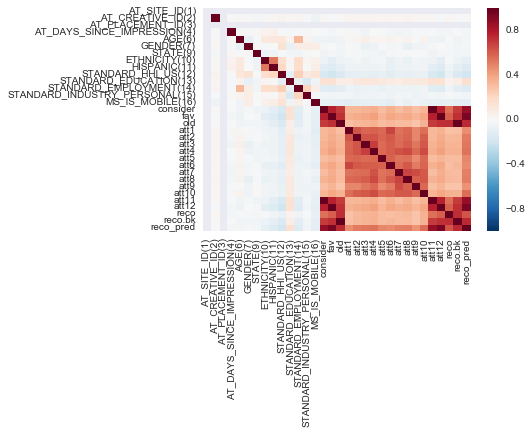

In [81]:
%matplotlib inline
import seaborn as sns
sns.heatmap(hal.corr())

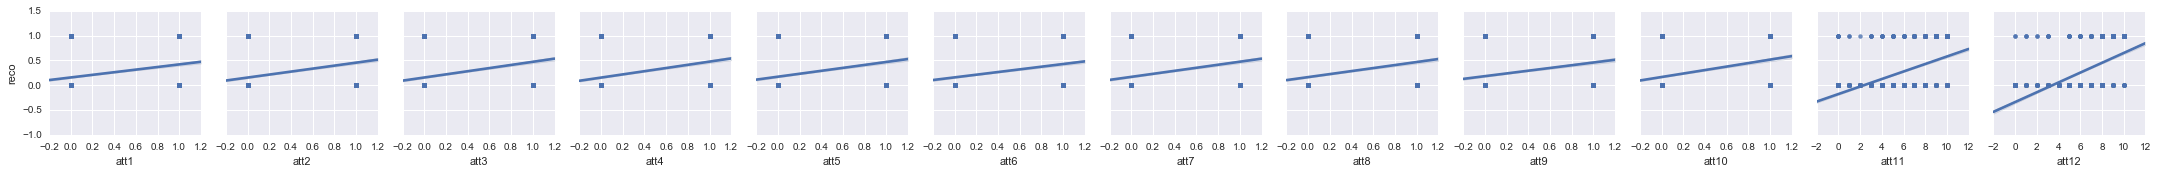

In [67]:
sns.pairplot(hal, x_vars=feature_cols, y_vars='reco', kind='reg')

In [82]:
logreg.score(X,y)

0.88327962764052992

In [72]:
logreg_predict = logreg.predict(X_test)

In [74]:
from sklearn import metrics

print metrics.accuracy_score(y_test,logreg_predict)

0.862660944206


In [75]:
zip(hal.column_names(), hal.column_types())

AttributeError: 'DataFrame' object has no attribute 'column_names'

In [94]:
# logistic regression total
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression()
feature_cols = ['atttotal']
X = hal[feature_cols]
y = hal.reco
logreg2.fit(X, y)
hal['reco_pred'] = logreg2.predict(X)

In [95]:
logreg2.score(X,y)

0.8342284282133906

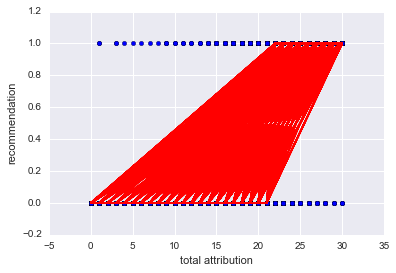

In [96]:
plt.scatter(hal.atttotal, hal.reco)
plt.plot(hal[feature_cols], hal.reco_pred, color='red')
plt.xlabel('total attribution')
plt.ylabel('recommendation')

In [97]:
hal['reco_pred_prob'] = logreg2.predict_proba(X)[:, 1]
hal.head()

,FED_RESPONSE_ID,SURVEY_TIME,SURVEY_NAME,AT_SITE_ID(1),AT_CREATIVE_ID(2),AT_PLACEMENT_ID(3),AT_DAYS_SINCE_IMPRESSION(4),AT_IMPRESSION_TIME(5),AGE(6),GENDER(7),...,att8,att9,att10,att11,att12,atttotal,reco,reco.bk,reco_pred,reco_pred_prob
0,E153FDB4-CEBF-E511-8111-125BDAFF1DF1,1/20/2016 17:37,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,11.0,2016-01-09T13.22.37.584000,67,1,...,1,0,1,7,9,22,1,9,1,0.502676
1,E9219D50-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:41,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,1.0,2016-01-19T13.23.57.881000,55,2,...,0,0,0,8,8,18,1,8,0,0.264835
2,950E6AA4-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:43,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,8.0,2016-01-12T04.39.55.858000,52,2,...,0,1,0,2,3,8,0,2,0,0.026591
3,F9A550FE-CFBF-E511-8111-125BDAFF1DF1,1/20/2016 17:46,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,2.0,2016-01-18T18.31.19.349000,64,2,...,0,0,0,7,8,15,0,7,0,0.142490
4,D1194D0A-D0BF-E511-8111-125BDAFF1DF1,1/20/2016 17:46,FEDAT52 - Holland American Line - Exposed,1.120000e+13,1.100000e+13,1.100000e+13,0.0,2016-01-20T02.20.35.276000,56,2,...,0,0,0,3,5,8,0,3,0,0.026591


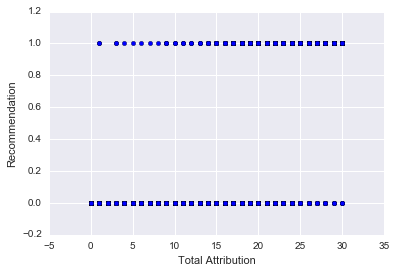

In [100]:
plt.scatter(hal.atttotal, hal.reco)
plt.plot(hal.atttotal, hal.reco_pred_prob, color='none')
plt.xlabel('Total Attribution')
plt.ylabel('Recommendation')

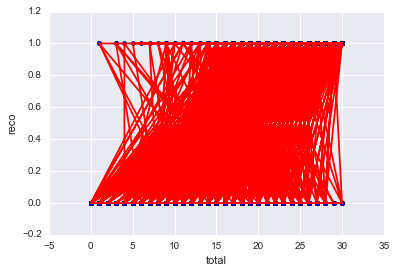

In [102]:
plt.scatter(hal.atttotal, hal.reco)
plt.plot(hal.atttotal, hal.reco, color='red')
plt.xlabel('total')
plt.ylabel('reco')

In [103]:
# print confusion matrix
print metrics.confusion_matrix(y_test,logreg_predict)

[[469  41]
 [ 55 134]]


In [104]:
confusion = metrics.confusion_matrix(y_test, logreg_predict)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [105]:
print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

True Positives: 134
True Negatives: 469
False Positives: 41
False Negatives: 55


In [107]:
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

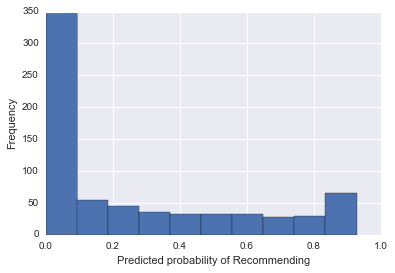

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of Recommending')
plt.ylabel('Frequency')

In [110]:
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.5, 1, 0)

In [111]:
print confusion

[[469  41]
 [ 55 134]]


In [112]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[469  41]
 [ 55 134]]


In [114]:
print 55 / float(55 + 134)

0.291005291005


In [115]:
print 469 / float(469 + 41)

0.919607843137


In [116]:
print metrics.accuracy_score(y_test, y_pred_class)

0.862660944206
